In [26]:
import numpy as np
# numpy is aliased as np
import pandas as pd
# pandas is aliased as pd
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
hd=pd.read_csv("C:/Users/Himanshu/Desktop/honeyproduction 1998-2021.csv")
hd.head()   # showing first 5 rows 

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [27]:
hd.shape   # no of rows = 985 , no of columns = 8

(985, 8)

In [5]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        985 non-null    object 
 1   numcol       985 non-null    float64
 2   yieldpercol  985 non-null    int64  
 3   totalprod    985 non-null    float64
 4   stocks       985 non-null    float64
 5   priceperlb   985 non-null    float64
 6   prodvalue    985 non-null    float64
 7   year         985 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 61.7+ KB


In [6]:
hd.isna().sum()   # no null values

State          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

In [7]:
hd.describe()   

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,985.000000,985.000000,9.850000e+02,9.850000e+02,985.000000,9.850000e+02,985.000000
mean,62892.385787,58.402030,4.035132e+06,1.167187e+06,1.969594,5.939911e+06,2009.291371
std,94163.791917,19.291695,6.752290e+06,2.088589e+06,1.177922,9.806595e+06,6.962251
min,2000.000000,3.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,45.000000,4.690000e+05,1.080000e+05,1.200000,1.037000e+06,2003.000000
50%,26000.000000,55.000000,1.488000e+06,3.600000e+05,1.700000,2.409000e+06,2009.000000
75%,68000.000000,70.000000,3.780000e+06,1.217000e+06,2.360000,5.897000e+06,2015.000000
max,530000.000000,136.000000,4.641000e+07,1.380000e+07,8.230000,8.385900e+07,2021.000000


In [8]:
hd.corr()   # correlation between columns of the given dataset

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
numcol,1.000000,0.198576,0.949640,0.796897,-0.223360,0.912601,0.034365
yieldpercol,0.198576,1.000000,0.364392,0.356294,-0.398247,0.224704,-0.318318
totalprod,0.949640,0.364392,1.000000,0.864333,-0.252678,0.900720,-0.048837
stocks,0.796897,0.356294,0.864333,1.000000,-0.284894,0.693372,-0.137590
priceperlb,-0.223360,-0.398247,-0.252678,-0.284894,1.000000,-0.088529,0.694738
prodvalue,0.912601,0.224704,0.900720,0.693372,-0.088529,1.000000,0.178040
year,0.034365,-0.318318,-0.048837,-0.137590,0.694738,0.178040,1.000000


In [9]:
hd.dtypes

State           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

### Q1 How has honey production yield changed from 1998 to 2021 ?

In [10]:
honey_prod_change=hd.groupby('year')[['totalprod']].mean()
honey_prod_change.head()

,totalprod
year,
1998,5.105093e+06
1999,4.706674e+06
2000,5.106000e+06
2001,4.221545e+06
2002,3.892386e+06


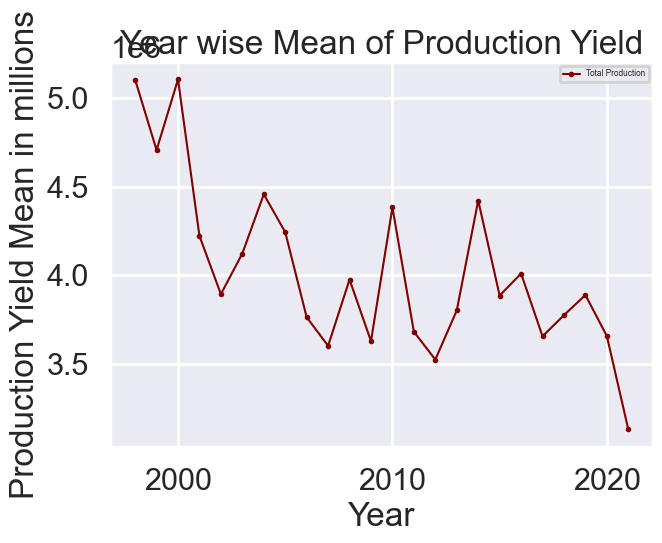

In [57]:
# => Insight => We clearly see that production yield is decreaseing as compared to the 1998 till 2021,
# but its not totlly declining. We see hike in some year as compared to its pervious like in 1999,
# 2002 to 2004 we get a sudden hike in production,similarly in 2009,2012,2013 we get hike as compared to pervious year.


plt.figure(figsize=(7,5))                        # fixing the figure size 
plt.plot(honey_prod_change.index,honey_prod_change['totalprod'],color='maroon',label='Total Production',
         lw=1.5,marker='o',markersize=3)         # depecting it in a line chart to visualize data we recieve
plt.title('Year wise Mean of Production Yield')  # Giving the title for the graph 
plt.xlabel('Year')                               # taking years in x-axix
plt.ylabel('Production Yield Mean in millions')  # Mean of Production yield in millions
plt.legend()           # Add legend in plot
plt.show()


### Q2 Over time, what are the major production trends across the states?

In [15]:
hd['State'].value_counts()

Alabama           24
Montana           24
New Jersey        24
New York          24
North Carolina    24
North Dakota      24
Ohio              24
Oregon            24
Pennsylvania      24
South Dakota      24
Tennessee         24
Texas             24
Utah              24
Vermont           24
Virginia          24
Washington        24
West Virginia     24
Wisconsin         24
Wyoming           24
Arizona           24
Nebraska          24
Missouri          24
Iowa              24
Arkansas          24
California        24
Colorado          24
Florida           24
Georgia           24
Hawaii            24
Idaho             24
Illinois          24
Indiana           24
Kansas            24
Mississippi       24
Kentucky          24
Louisiana         24
Maine             24
Michigan          24
Minnesota         24
New Mexico        15
Nevada            11
South Carolina    11
Oklahoma           6
Maryland           6
Name: State, dtype: int64

In [16]:
# Group the dataset by year and state and taking mean of total production
totprod_mean=hd.groupby(['year','State'])['totalprod'].mean().reset_index()
# printing the type of totprod_mean.
print(type(totprod_mean)) 
# Showing totprod_mean dataframe with top 10 rows.
totprod_mean.head(10)     

<class 'pandas.core.frame.DataFrame'>


,year,State,totalprod
0,1998,Alabama,1136000.0
1,1998,Arizona,3300000.0
2,1998,Arkansas,3445000.0
3,1998,California,37350000.0
4,1998,Colorado,1944000.0
5,1998,Florida,22540000.0
6,1998,Georgia,4200000.0
7,1998,Hawaii,944000.0
8,1998,Idaho,6000000.0
9,1998,Illinois,639000.0


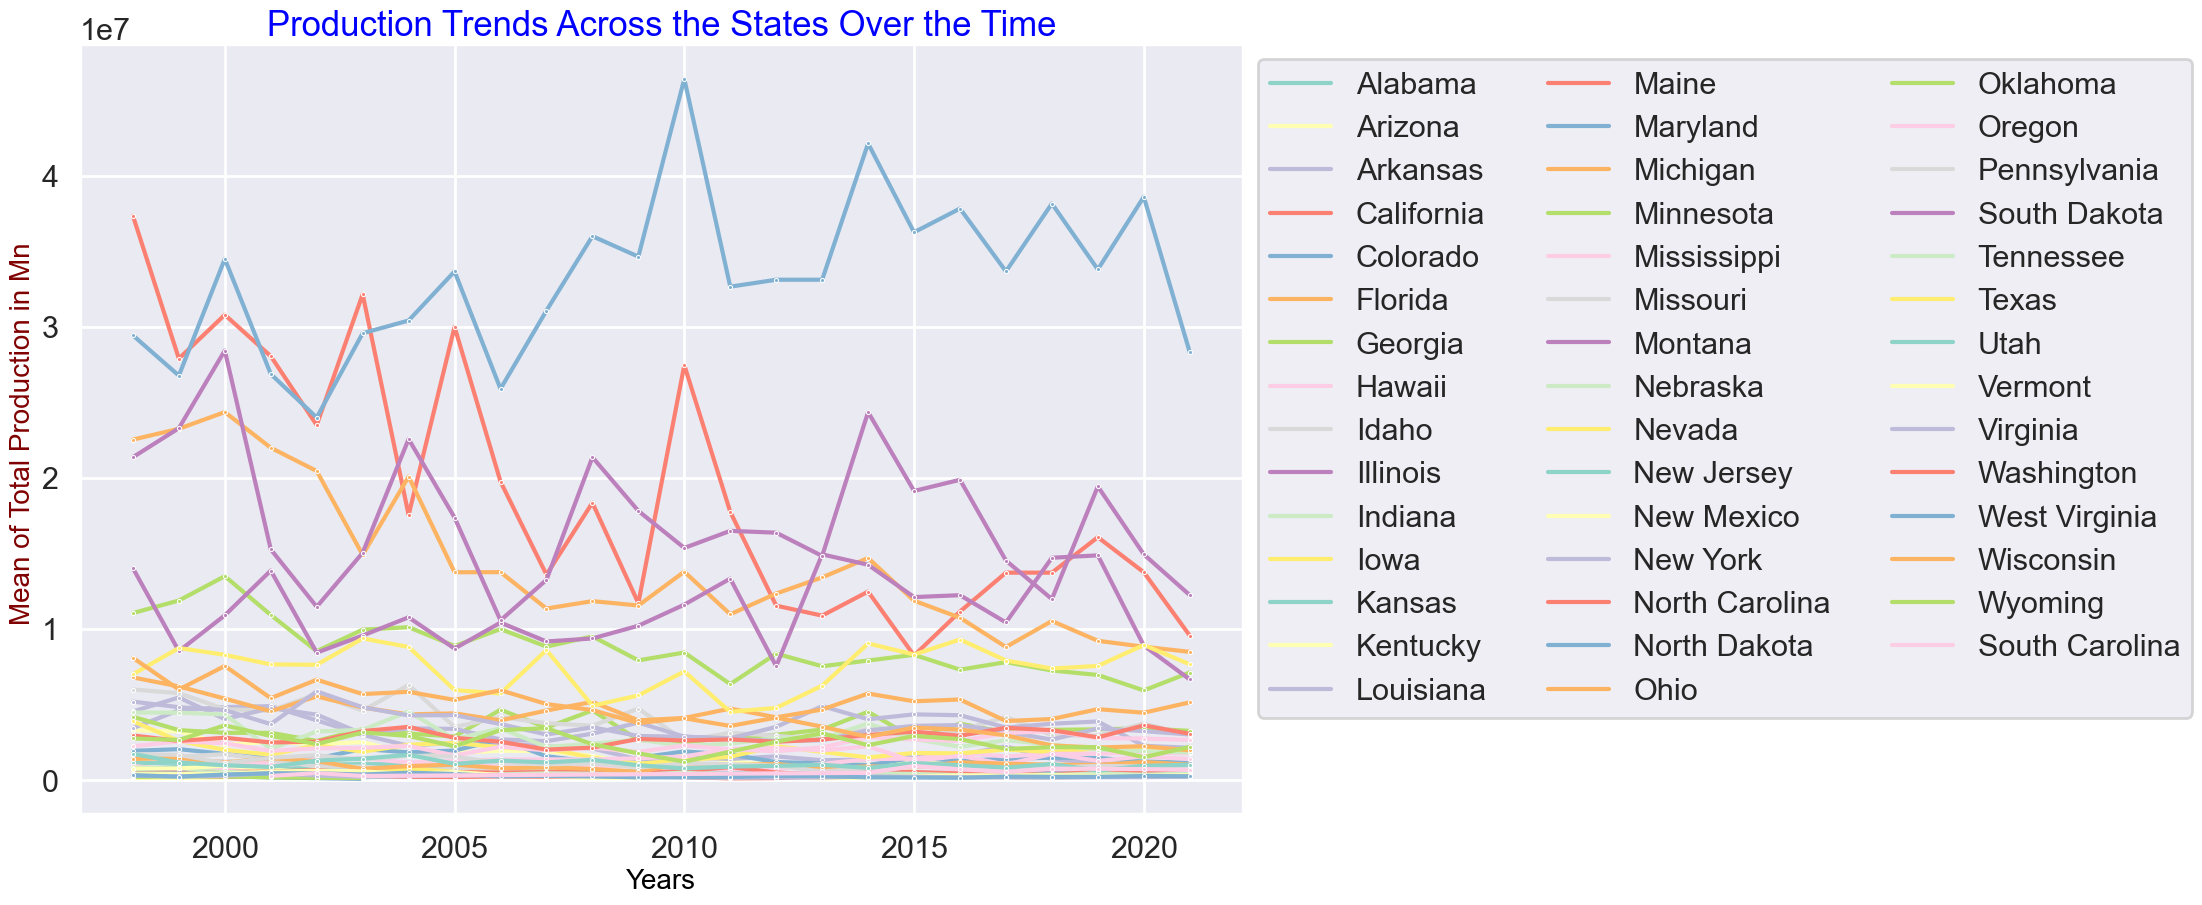

In [17]:
sns.set(rc={'figure.figsize':(15,10)})  # set the figure size 
sns.set_context('poster')           
sns.set_style('darkgrid')
sns.lineplot(data=totprod_mean,x='year',y='totalprod',hue='State',palette='Set3',lw=3,marker='o',markersize=3)
#plotting using seaborn and taking state as hue

plt.legend(bbox_to_anchor=(1, 1),ncol=3)             #Adding legend and put out of the plot  
plt.xlabel('Years',size=20,color='black')            # Adding x label as year
plt.ylabel('Mean of Total Production in Mn ',size=20,color='maroon')  # Adding y label ad mean of total production
plt.title('Production Trends Across the States Over the Time',size=25,color='blue')  # Adding the title for the plot
plt.show()


In [18]:
hd['State'].nunique()

44

In [19]:
hd.duplicated().sum()

0

### Q3 Does the data show any trends in terms of the number of honey producing colonies and yield per colony before 2006, which was when concern over Colony Collapse Disorder spread nationwide?

In [20]:
hd_2006=hd[hd['year']<=2006]
hd_2006.shape

(384, 8)

In [21]:
hd_2006['year'].value_counts()

2001    44
2002    44
2003    44
1998    43
1999    43
2000    43
2004    41
2005    41
2006    41
Name: year, dtype: int64

In [22]:
hd_2006['numcol'].unique()

array([ 16000.,  55000.,  53000., 450000.,  27000., 230000.,  75000.,
         8000., 120000.,   9000.,  50000.,   3000.,  41000.,  10000.,
         7000.,  80000., 140000.,  18000.,  23000., 115000.,  64000.,
        11000.,  14000.,  65000.,   4000.,  26000., 225000.,  91000.,
        30000.,   6000.,  58000.,  89000.,  46000.,  17000.,  52000.,
       465000., 228000.,  40000.,  13000.,  48000.,  73000., 145000.,
        24000., 122000.,  15000.,  69000., 255000.,  20000.,  45000.,
        28000., 224000., 108000.,  37000., 440000.,  29000., 232000.,
       100000.,  43000.,  72000., 150000., 124000., 300000.,  25000.,
       235000., 105000.,  84000.,  39000., 460000., 220000.,  33000.,
        76000., 135000.,  22000., 136000., 280000.,  44000.,  97000.,
        67000.,  38000.,  12000., 470000.,   5000.,  35000., 117000.,
       134000.,  60000., 320000., 114000.,  70000., 480000., 210000.,
        32000.,  34000.,   2000.,  21000., 340000.,  42000., 215000.,
        74000., 3900

In [23]:
hd2006=hd_2006.groupby('year')[['numcol','yieldpercol']].mean().reset_index()
hd2006.columns

Index(['year', 'numcol', 'yieldpercol'], dtype='object')

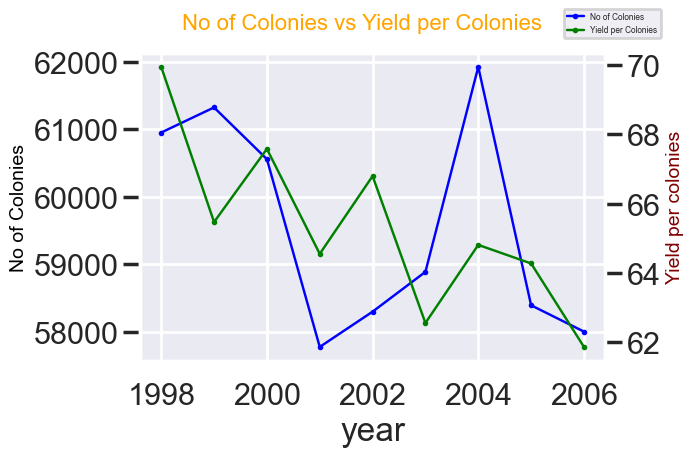

In [25]:
# => using dual axis chart to vizualise the relationship between no of colonies and Yield per Colonies => 
fig, ax1 = plt.subplots(figsize=(6,4)) # Fixing size of each axis
ax2 = ax1.twinx() #make a twin of axis 1

ax1.plot(hd2006['year'], hd2006['numcol'], color='blue', lw=1.75,marker='o',markersize=3,label='No of Colonies')
#ploting line chart of  Year and number of colonies using Matplotlib 
ax2.plot(hd2006['year'], hd2006['yieldpercol'], color='green', lw=1.75,marker='o',markersize=3,label='Yield per Colonies')
#ploting line chart of  Year and Yield per Colonies using Matplotlib
ax1.set_xlabel("year")  # defining the x-axis
ax1.set_ylabel("No of Colonies", color='black', fontsize=14)  # giving name of y-axis1

ax2.set_ylabel("Yield per colonies", color='maroon', fontsize=14) # giving name of y-axis2
fig.legend(bbox_to_anchor=(1, 1),ncol=1) # Adding legend outside the chart
plt.rc('legend',fontsize=6)              # fixing the fonsize of legend
plt.grid()                               # Enable the grid 
fig.suptitle("No of Colonies vs Yield per Colonies ", fontsize=16,color='Orange') # Adding the title of the chart
fig.show()                          # showing the chart

### Q4  Are there any patterns that can be observed between total honey production and value of production every year?

In [31]:
prod_value=hd.groupby('year')[['totalprod','prodvalue']].sum()
# Sum of total production and Value of production based on year
prod_value.head()

,totalprod,prodvalue
year,,
1998,219519000.0,146091000.0
1999,202387000.0,123657000.0
2000,219558000.0,131568000.0
2001,185748000.0,132282000.0
2002,171265000.0,227302000.0


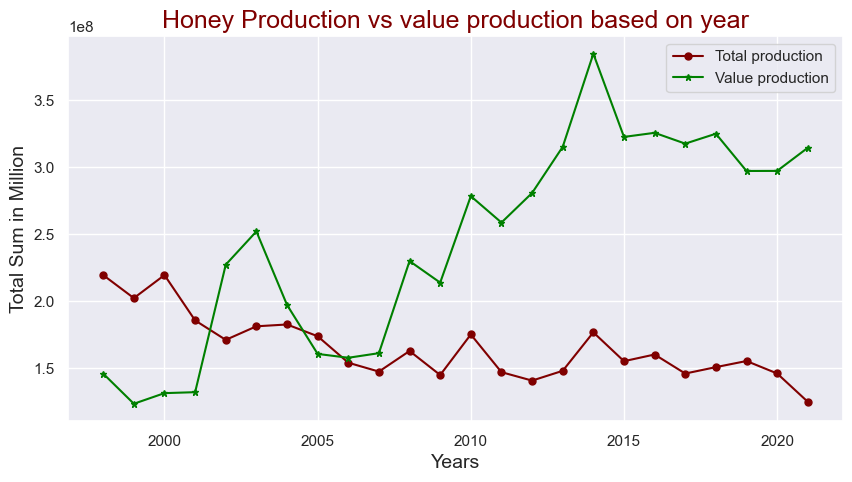

In [99]:
plt.figure(figsize=(10,5))   # fixing the figure size
plt.plot(prod_value.index,prod_value['totalprod'],marker='o',markersize=5,lw=1.5,color='maroon',label='Total production')

#ploting line chart between total production and year

plt.plot(prod_value.index,prod_value['prodvalue'],marker='*',markersize=5,lw=1.5,color='green',label='Value production')

#ploting line chart between total production and year

plt.xlabel('Years',size=14)   # Adding x label as year
plt.ylabel('Total Sum in Million',size=14) # Adding y label as Total Sum in million 
plt.title('Honey Production vs value production based on year',size=18,color='maroon') # Adding the title of the plot
plt.legend()   # Adding legend in the plot
plt.show()


## Output =>
 As per the visualization we clearly see that the<b> production of honey is decreasing throughout so that value of production increase rapidly </b>in some years like(2001,2002,2007,2009,and 2013). After 2010 differnce increase which clearly indicate the proction of honey is not up to mark.     

### Q5 How has the value of production, which in some sense could be tied to demand, changed every year?

In [33]:
demand=hd.groupby('year')['prodvalue','stocks'].mean().reset_index()   
# mean of production value and stocks to depecit the demand on basis of the year
demand.head()  # showing first 5 rows

,year,prodvalue,stocks
0,1998,3.397465e+06,1.873605e+06
1,1999,2.875744e+06,1.823023e+06
2,2000,3.059721e+06,1.975721e+06
3,2001,3.006409e+06,1.471909e+06
4,2002,5.165955e+06,8.903864e+05


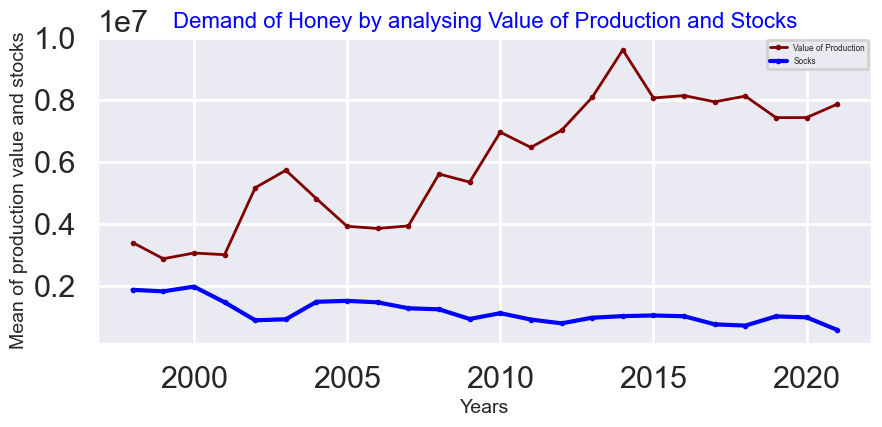

In [43]:
plt.figure(figsize=(10,4))   # fix the figure size
plt.plot(demand['year'],demand['prodvalue'],color='maroon',lw=2,marker='o',markersize=3,label='Value of Production')
# line ploting between year and production value 
plt.plot(demand['year'],demand['stocks'],color='blue',lw=3,marker='o',markersize=3,label='Socks')
# line ploting between year and stocks 
plt.xlabel('Years',size=14)   # Adding x label as year
plt.ylabel('Mean of production value and stocks',size=14)  # Adding y label as Mean of production and stock 
plt.title('Demand of Honey by analysing Value of Production and Stocks',color='blue',size=16) 
# Adding the title for the plot
plt.legend()   # Adding legend into plot
plt.show()

### Output =>
We clearly visualize that as the stock down as passing the years the value of production for honey has increse throughout.
This visualization also tells us that as <b>stocks goes down demand automatically increase and that makes production valuable</b> thats why we see that hike in value of proction as stocks does down.

### Q6 Constructs the related plots using Seaborn and Matplot apply customization and derive insights from the visualization.

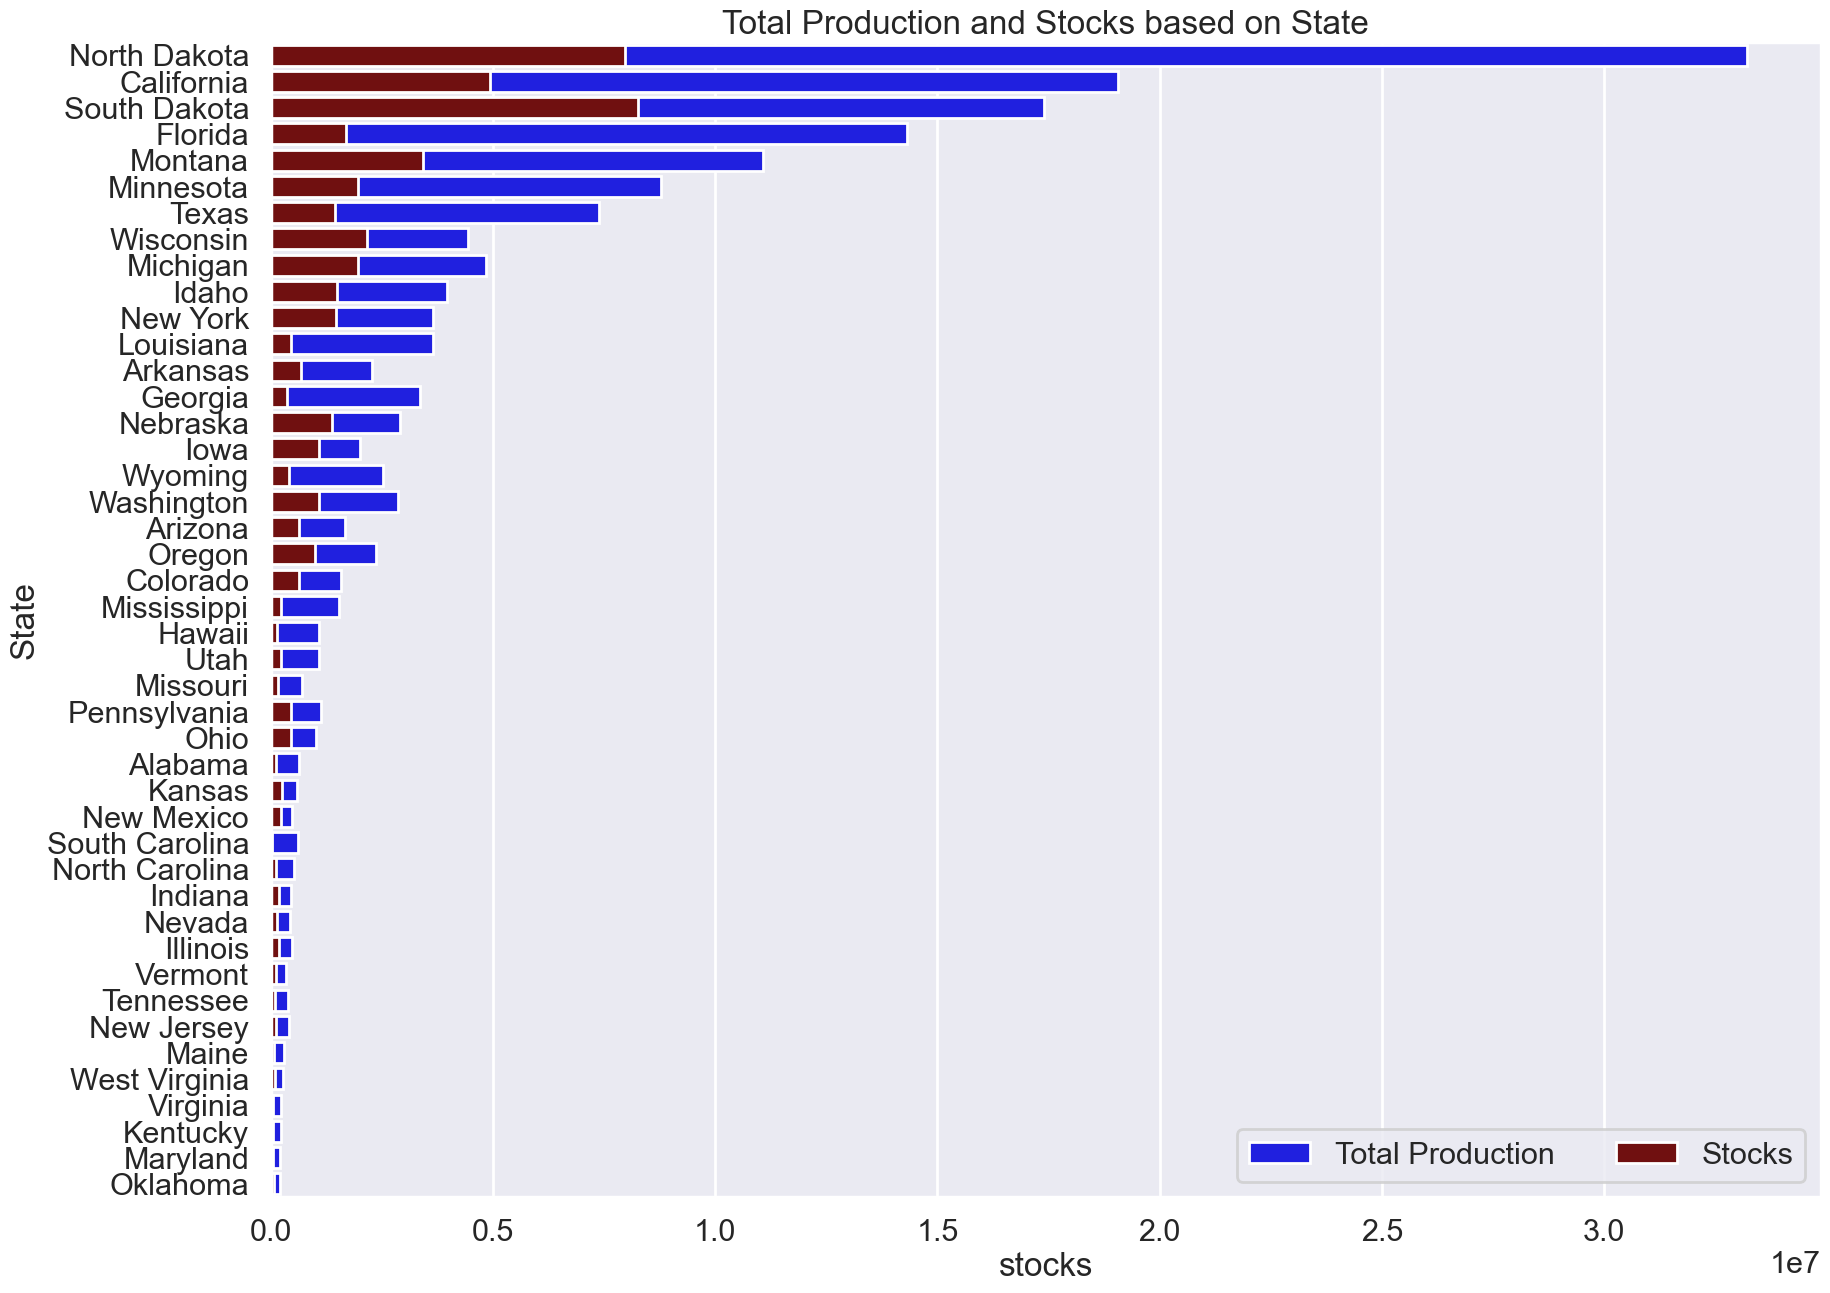

In [130]:
plt.figure(figsize=(20,15))   # Fixing the figure size
sns.barplot(x='totalprod',y='State',data=hd.sort_values('totalprod',ascending=False),
            label='Total Production',color='blue',ci=None)   
# Ploting Total production and State using Seaborn
sns.barplot(x='stocks',y='State',data=hd.sort_values('totalprod',ascending=False),
            label='Stocks',color='maroon',ci=None)
# Ploting Stocks vs State using Seaborn
plt.legend(ncol=2,loc='lower right',frameon=True) # Adding legends  
plt.title('Total Production and Stocks based on State')   # Giving the chart title
plt.show()